In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from joblib import dump
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

База без разбиения по дням

In [4]:
knn_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/knn_data.csv')
avg_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/avg_data.csv')
moda_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/moda_data.csv')
knn_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/knn_data_clear.csv')
avg_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/avg_data_clear.csv')
moda_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/moda_data_clear.csv')


Базы с разбиением по дням

In [3]:
knn_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/knn_zero_day_data.csv')
avg_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/avg_zero_day_data.csv')
moda_zero_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/moda_zero_day_data.csv')
knn_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/knn_zero_day_data_clear.csv')
avg_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/avg_zero_day_data_clear.csv')
moda_zero_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/zero/moda_zero_day_data_clear.csv')

knn_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/knn_one_day_data.csv')
avg_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/avg_one_day_data.csv')
moda_one_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/moda_one_day_data.csv')
knn_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/knn_one_day_data_clear.csv')
avg_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/avg_one_day_data_clear.csv')
moda_one_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/one/moda_one_day_data_clear.csv')

knn_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/knn_two_day_data.csv')
avg_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/avg_two_day_data.csv')
moda_two_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/moda_two_day_data.csv')
knn_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/knn_two_day_data_clear.csv')
avg_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/avg_two_day_data_clear.csv')
moda_two_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/two/moda_two_day_data_clear.csv')

knn_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/knn_three_day_data.csv')
avg_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/avg_three_day_data.csv')
moda_three_day_data = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/moda_three_day_data.csv')
knn_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/knn_three_day_data_clear.csv')
avg_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/avg_three_day_data_clear.csv')
moda_three_day_data_clear = pd.read_csv('https://raw.githubusercontent.com/RusinDima12/BSR/main/data/three/moda_three_day_data_clear.csv')

Undersampling

In [4]:
knn_zero_day_data

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,DEATH
0,0.348485,0.0,0.000000,0.000000,0.00,1.0,0.000000,0.0,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.590909,0.0,0.000000,0.166667,0.25,0.5,0.666667,0.0,0.38,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.484848,1.0,0.000000,0.000000,0.00,1.0,0.666667,0.0,0.20,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.257576,1.0,0.666667,0.333333,0.25,1.0,0.000000,0.0,0.00,0.0,...,0.6,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.348485,1.0,0.000000,0.666667,0.25,0.5,0.666667,0.0,0.30,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,0.545455,1.0,0.000000,0.000000,0.00,0.0,0.000000,1.0,0.70,0.0,...,0.6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1572,0.666667,0.0,0.000000,0.333333,0.25,0.5,0.666667,0.0,0.70,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1573,0.666667,0.0,0.000000,1.000000,0.25,0.5,0.666667,0.0,0.70,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1574,0.803030,0.0,0.333333,0.333333,0.25,0.5,0.666667,0.0,0.70,0.0,...,1.0,0.1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


Глупая модель

Оценка?

* стратифицированная
* 5-10 случайных разбивок и показать статистику результатов
* Loss - кросс-энтропия, показатели - F1 + accuracy + confusion matrix


TODO: 

* линейная модель (2 классов) - посмотреть коэффициенты (важность) для масштабированных данных [0, 1]
* random forest - важность переменных
* НС (colab + TF + softmax (2 и 7) + sigmoid/ReLU) 

TODO доп: 

* PCA для числовыхю Глянуть объясн.дисперсию
* feature selection (2^n)

# Models

In [57]:
def GaussianNBMOdel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    y_pred = grid.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'GaussianNB')

In [40]:
def catBoostModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    CBC = CatBoostClassifier()
    parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
    Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
    Grid_CBC.fit(X_train, y_train)
    
    print (Grid_CBC.best_params_)
    y_pred = Grid_CBC.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'catBoost')

In [71]:
def Logistic_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    regressor = LogisticRegression()
    parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    grid = GridSearchCV(estimator=regressor, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(X_train, y_train)

    feature_names = X.columns

    #model_coefficients = regressor.coef_

    #coefficients_df = pd.DataFrame(data = model_coefficients, 
                                  #index = feature_names, 
                                  #columns = ['Coefficient value'])
    #print(coefficients_df)
    print (grid.best_params_)
    y_pred = grid.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'Logistic_model')
    dump(grid, './miokard_dt_v1.joblib')

In [67]:
def SVC_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    parameters = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}           
    clf = GridSearchCV( SVC(), parameters)
    clf.fit(X_train, y_train)
    print (clf.best_params_)
    y_pred = clf.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'Logistic_model')

In [66]:
def RF_model_function (X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    RF = RandomForestClassifier(random_state = 42)
    parameters = { 
        'n_estimators': [200, 500],
        'max_features': [None, 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
    clf = GridSearchCV( RF, parameters,cv= 5)
    
    clf.fit(X_train, y_train)
    print (clf.best_params_)
    y_pred = clf.predict(X_test)
    
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results)
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'Logistic_model')

In [65]:
def Keras_model_function (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
    print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
    print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
    model = Sequential()
    model.add(Dense(200, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size = 22,validation_data=(X_test, y_test))
    _, accuracy = model.evaluate(X_train, y_train)
    print('Accuracy train: %.2f' % (accuracy*100))
    
    y_pred = model.predict(X_test)
    #y_pred = y_pred.reshape(323,)
    #results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    #print(results)
    

    matrix = confusion_matrix(y_test, np.round(y_pred))
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, np.round(y_pred), target_names=target_names)) 
    roc_plot(y_test,y_pred,'Logistic_model')
    
    ax = sns.heatmap(matrix, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [61]:
def roc_plot(y_test,y_pred,NameModel):
    lr_auc = roc_auc_score(y_test, y_pred)
    print(NameModel,': ROC AUC=%.3f' % (lr_auc))
    fpr, tpr, treshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(NameModel)
    plt.legend(loc="lower right")
    plt.show()

TODO
* classification report +
* добавить в colab +
* сделать выгрузку в файлы +
* пересмотреть архитектуру
* пересмотреть ошибку
* cv grid search +

Zero day

In [5]:
y = knn_zero_day_data['DEATH']
X = knn_zero_day_data.drop(columns = ['DEATH'])
print(Counter(y))

Counter({0.0: 1323, 1.0: 253})


In [8]:
X_under.columns


Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03',
       'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
       'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT',
       'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST',
       'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im',
       'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
       'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
       'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09',
       'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_

In [9]:
df = pd.DataFrame()

In [11]:
df['sex']=['3,4,5']

In [20]:
df = pd.read_csv('fd.csv')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc8 in position 3245: invalid continuation byte

UnderSampling

In [6]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
print(Counter(y_under))

Counter({0.0: 253, 1.0: 253})


OverSampling

In [21]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0.0: 1323, 1.0: 1323})


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.1}
     Actual  Predicted
173     0.0        0.0
274     1.0        0.0
491     1.0        1.0
72      0.0        0.0
452     1.0        0.0
..      ...        ...
412     1.0        0.0
436     1.0        0.0
411     1.0        1.0
86      0.0        0.0
75      0.0        0.0

[102 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.65      0.83      0.73        48
     class 1       0.80      0.59      0.68        54

    accuracy                           0.71       102
   macro avg       0.72      0.71      0.70       102
weighted avg       0.73      0.71      0.70       102

GaussianNB : ROC AUC=0.713


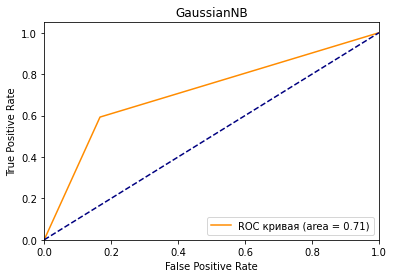

In [62]:
GaussianNBMOdel(X_under, y_under)

In [41]:
catBoostModel(X_under, y_under)

0:	learn: 0.6881390	total: 1.22ms	remaining: 71.8ms
1:	learn: 0.6835581	total: 2.29ms	remaining: 66.6ms
2:	learn: 0.6812028	total: 3.32ms	remaining: 63ms
3:	learn: 0.6779185	total: 4.32ms	remaining: 60.4ms
4:	learn: 0.6720598	total: 5.36ms	remaining: 59ms
5:	learn: 0.6678021	total: 6.37ms	remaining: 57.3ms
6:	learn: 0.6623375	total: 7.35ms	remaining: 55.7ms
7:	learn: 0.6577286	total: 8.33ms	remaining: 54.2ms
8:	learn: 0.6556561	total: 9.34ms	remaining: 52.9ms
9:	learn: 0.6517213	total: 10.4ms	remaining: 51.9ms
10:	learn: 0.6492485	total: 11.4ms	remaining: 50.8ms
11:	learn: 0.6459644	total: 12.4ms	remaining: 49.6ms
12:	learn: 0.6433616	total: 13.4ms	remaining: 48.5ms
13:	learn: 0.6403144	total: 14.4ms	remaining: 47.4ms
14:	learn: 0.6380046	total: 15.4ms	remaining: 46.3ms
15:	learn: 0.6353835	total: 16.4ms	remaining: 45.1ms
16:	learn: 0.6327227	total: 17.4ms	remaining: 44.1ms
17:	learn: 0.6301886	total: 18.4ms	remaining: 43ms
18:	learn: 0.6268520	total: 19.4ms	remaining: 41.9ms
19:	learn

C:\Users\Rusin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
14 fits failed out of a total of 28.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rusin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rusin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rusin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

{'C': 1.0, 'penalty': 'l2'}
      Actual  Predicted
1616     1.0        1.0
869      0.0        0.0
254      1.0        1.0
1146     0.0        0.0
188      0.0        0.0
...      ...        ...
862      0.0        0.0
1093     0.0        0.0
802      0.0        0.0
2512     1.0        1.0
279      0.0        0.0

[530 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.82      0.85      0.84       265
     class 1       0.84      0.82      0.83       265

    accuracy                           0.83       530
   macro avg       0.83      0.83      0.83       530
weighted avg       0.83      0.83      0.83       530

Logistic_model : ROC AUC=0.834


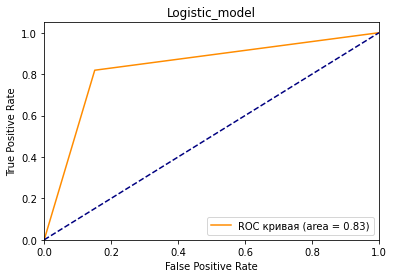

In [72]:
Logistic_model_function(X_over, y_over)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
     Actual  Predicted
173     0.0        0.0
274     1.0        1.0
491     1.0        1.0
72      0.0        0.0
452     1.0        0.0
..      ...        ...
412     1.0        0.0
436     1.0        1.0
411     1.0        1.0
86      0.0        1.0
75      0.0        0.0

[102 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.74      0.71      0.72        48
     class 1       0.75      0.78      0.76        54

    accuracy                           0.75       102
   macro avg       0.74      0.74      0.74       102
weighted avg       0.74      0.75      0.74       102

Logistic_model : ROC AUC=0.743


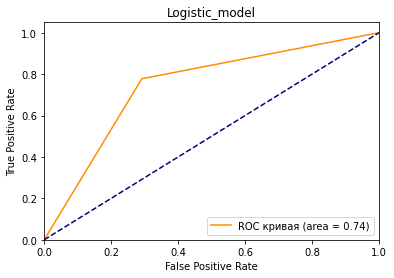

In [68]:
SVC_model_function (X_under, y_under)

In [37]:
RF_model_function (X_under, y_under)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
     Actual  Predicted
173     0.0        0.0
274     1.0        0.0
491     1.0        1.0
72      0.0        0.0
452     1.0        0.0
..      ...        ...
412     1.0        1.0
436     1.0        0.0
411     1.0        1.0
86      0.0        0.0
75      0.0        0.0

[102 rows x 2 columns]
              precision    recall  f1-score   support

     class 0       0.74      0.83      0.78        48
     class 1       0.83      0.74      0.78        54

    accuracy                           0.78       102
   macro avg       0.79      0.79      0.78       102
weighted avg       0.79      0.78      0.78       102



Количество строк в y_train по классам: [205 199]
Количество строк в y_test по классам: [48 54]
Epoch 1/50
19/19 [==============================] - 1s 19ms/step - loss: 0.6619 - accuracy: 0.5718 - val_loss: 0.6362 - val_accuracy: 0.6275
Epoch 2/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5700 - accuracy: 0.7153 - val_loss: 0.5419 - val_accuracy: 0.7255
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.4943 - accuracy: 0.7624 - val_loss: 0.5057 - val_accuracy: 0.7451
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.4593 - accuracy: 0.7871 - val_loss: 0.4812 - val_accuracy: 0.7941
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8342 - val_loss: 0.4861 - val_accuracy: 0.7745
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.3733 - accuracy: 0.8218 - val_loss: 0.4623 - val_accuracy: 0.7843
Epoch 7/50
19/19 [==============================] - 0s 8ms/step 

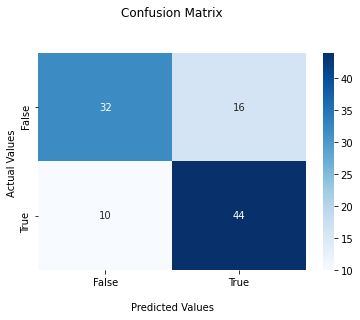

In [36]:
Keras_model_function (X_under, y_under)

First day

In [21]:
y = knn_one_day_data['DEATH']
X = knn_one_day_data.drop(columns = ['DEATH'])

Количество строк в y_train по классам: [1051  210]
Количество строк в y_test по классам: [272  44]
Epoch 1/50
58/58 [==============================] - 1s 9ms/step - loss: 0.4341 - accuracy: 0.8287 - val_loss: 0.3155 - val_accuracy: 0.8766
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3225 - accuracy: 0.8668 - val_loss: 0.2687 - val_accuracy: 0.8924
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.8660 - val_loss: 0.2489 - val_accuracy: 0.9019
Epoch 4/50
58/58 [==============================] - 0s 8ms/step - loss: 0.2615 - accuracy: 0.8866 - val_loss: 0.2566 - val_accuracy: 0.8956
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.2370 - accuracy: 0.9009 - val_loss: 0.2407 - val_accuracy: 0.8956
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 0.2148 - accuracy: 0.9064 - val_loss: 0.2565 - val_accuracy: 0.9051
Epoch 7/50
58/58 [==============================] - 0s 5ms/st

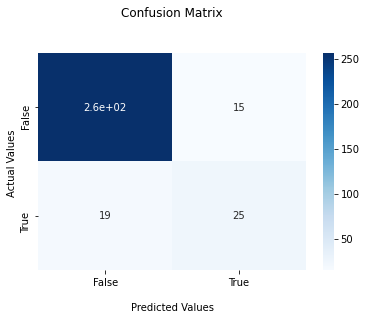

In [22]:
Keras_model_function (X,y)

Second day

In [23]:
y = knn_two_day_data['DEATH']
X = knn_two_day_data.drop(columns = ['DEATH'])

Количество строк в y_train по классам: [1054 1062]
Количество строк в y_test по классам: [269 261]
Epoch 1/50
97/97 [==============================] - 1s 7ms/step - loss: 0.5270 - accuracy: 0.7283 - val_loss: 0.4745 - val_accuracy: 0.7642
Epoch 2/50
97/97 [==============================] - 1s 6ms/step - loss: 0.3853 - accuracy: 0.8365 - val_loss: 0.3785 - val_accuracy: 0.8189
Epoch 3/50
97/97 [==============================] - 1s 6ms/step - loss: 0.3120 - accuracy: 0.8781 - val_loss: 0.3156 - val_accuracy: 0.8679
Epoch 4/50
97/97 [==============================] - 1s 6ms/step - loss: 0.2485 - accuracy: 0.9064 - val_loss: 0.2922 - val_accuracy: 0.8792
Epoch 5/50
97/97 [==============================] - 1s 6ms/step - loss: 0.1983 - accuracy: 0.9263 - val_loss: 0.2734 - val_accuracy: 0.8943
Epoch 6/50
97/97 [==============================] - 1s 6ms/step - loss: 0.1317 - accuracy: 0.9565 - val_loss: 0.2464 - val_accuracy: 0.9170
Epoch 7/50
97/97 [==============================] - 1s 6ms/st

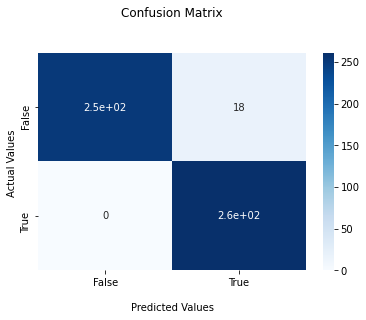

In [29]:
Keras_model_function (X_over, y_over)

Third day

In [31]:
y = knn_three_day_data['DEATH']
X = knn_three_day_data.drop(columns = ['DEATH'])

Количество строк в y_train по классам: [1068  200]
Количество строк в y_test по классам: [266  52]
Epoch 1/50
58/58 [==============================] - 1s 9ms/step - loss: 0.4005 - accuracy: 0.8462 - val_loss: 0.3642 - val_accuracy: 0.8428
Epoch 2/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3048 - accuracy: 0.8801 - val_loss: 0.3388 - val_accuracy: 0.8491
Epoch 3/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2767 - accuracy: 0.8912 - val_loss: 0.3443 - val_accuracy: 0.8616
Epoch 4/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2412 - accuracy: 0.9054 - val_loss: 0.3520 - val_accuracy: 0.8616
Epoch 5/50
58/58 [==============================] - 0s 7ms/step - loss: 0.2113 - accuracy: 0.9196 - val_loss: 0.3658 - val_accuracy: 0.8553
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 0.1843 - accuracy: 0.9290 - val_loss: 0.3723 - val_accuracy: 0.8396
Epoch 7/50
58/58 [==============================] - 0s 8ms/st

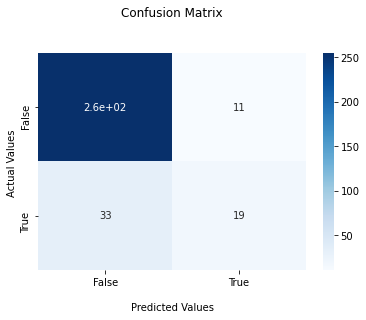

In [32]:
Keras_model_function (X,y)